<a href="https://colab.research.google.com/github/milad-s5/DL_HW2/blob/main/DL_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset and import libs

In [ ]:
import sys
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D , BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#confusion_mtx
from numpy import expand_dims
import pandas as pd
import seaborn as sn
#vgg
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
import tensorflow_datasets as tfds

In [ ]:
(x_train  , y_train) , (x_test , y_test)  = cifar10.load_data()          

170508288/170498071 [==============================] - 4s 0us/step


# Display 10 images with their labels

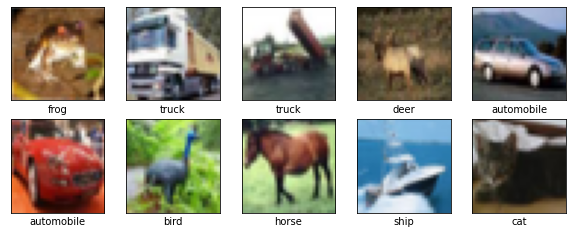

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = 10 # or = len(np.unique(y_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Preprocessing

In [ ]:
# train and test data with normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train,Test,Valid,One Hot
num_valid = int(0.2*x_train.shape[0])
num_train = x_train.shape[0]-num_valid

x_valid = x_train[num_train:]
y_valid = y_train[num_train:]

x_train = x_train[0:num_train]
y_train = y_train[0:num_train]

# one-hot encode the labels
y_train_hot = to_categorical(y_train, num_classes)
y_valid_hot = to_categorical(y_valid, num_classes)
y_test_hot = to_categorical(y_test, num_classes)

In [ ]:
# check shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))
print('y_train_hot:\t {}\n'.format(y_train_hot.shape))

print('x_valid:\t {}'.format(x_valid.shape))
print('y_valid:\t {}'.format(y_valid.shape))
print('y_valid_hot:\t {}\n'.format(y_valid_hot.shape))

print('x_test:\t\t {}'.format(x_test.shape))
print('y_test:\t\t {}'.format(y_test.shape))
print('y_test_hot:\t {}'.format(y_test_hot.shape))

x_train:	 (40000, 32, 32, 3)
y_train:	 (40000, 1)
y_train_hot:	 (40000, 10)

x_valid:	 (10000, 32, 32, 3)
y_valid:	 (10000, 1)
y_valid_hot:	 (10000, 10)

x_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)
y_test_hot:	 (10000, 10)


# MLP

In [ ]:
def plot_curves(history):
	# plot loss
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], label='train')
	plt.plot(history.history['val_loss'], label='test')
	plt.show()
	# plot accuracy
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.show()

Epoch 1/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9466 - accuracy: 0.2979 - val_loss: 1.8534 - val_accuracy: 0.3369
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8189 - accuracy: 0.3507 - val_loss: 1.8361 - val_accuracy: 0.3515
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7762 - accuracy: 0.3657 - val_loss: 1.8065 - val_accuracy: 0.3566
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7595 - accuracy: 0.3718 - val_loss: 1.7632 - val_accuracy: 0.3793
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7394 - accuracy: 0.3802 - val_loss: 1.7588 - val_accuracy: 0.3700
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7226 - accuracy: 0.3862 - val_loss: 1.7917 - val_accuracy: 0.3515
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7110 - accuracy: 0.3866 - val_loss: 1.7634 - val_ac

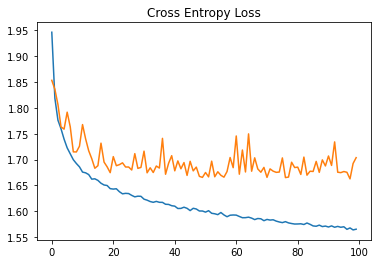

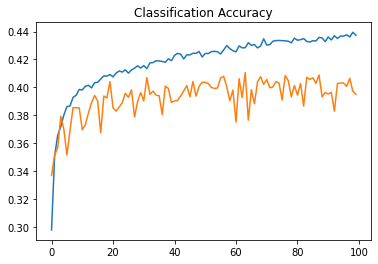

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9221 - accuracy: 0.3102 - val_loss: 1.8050 - val_accuracy: 0.3664
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7405 - accuracy: 0.3826 - val_loss: 1.7186 - val_accuracy: 0.3945
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6547 - accuracy: 0.4137 - val_loss: 1.6796 - val_accuracy: 0.4034
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6053 - accuracy: 0.4309 - val_loss: 1.6385 - val_accuracy: 0.4235
Epoch 5/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5609 - accuracy: 0.4482 - val_loss: 1.5828 - val_accuracy: 0.4428
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5257 - accuracy: 0.4606 - val_loss: 1.6549 - val_accuracy: 0.4094
Epoch 7/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4927 - accuracy: 0.4711 - val_loss: 1.5383 - val_ac

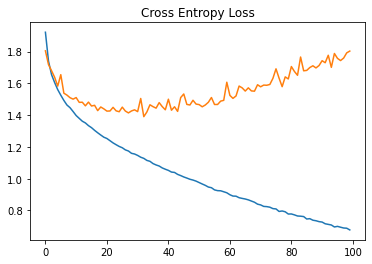

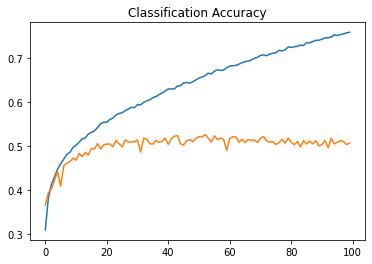

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(64, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9020 - accuracy: 0.3226 - val_loss: 1.7899 - val_accuracy: 0.3710
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7303 - accuracy: 0.3921 - val_loss: 1.7155 - val_accuracy: 0.3997
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6635 - accuracy: 0.4129 - val_loss: 1.6755 - val_accuracy: 0.4126
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6134 - accuracy: 0.4326 - val_loss: 1.6639 - val_accuracy: 0.4178
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5762 - accuracy: 0.4454 - val_loss: 1.6230 - val_accuracy: 0.4336
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5417 - accuracy: 0.4580 - val_loss: 1.5959 - val_accuracy: 0.4404
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5192 - accuracy: 0.4654 - val_loss: 1.5691 - val_ac

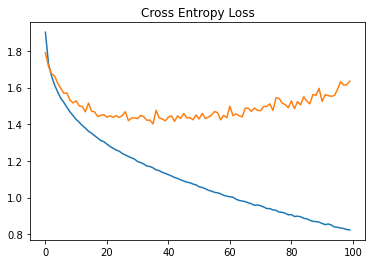

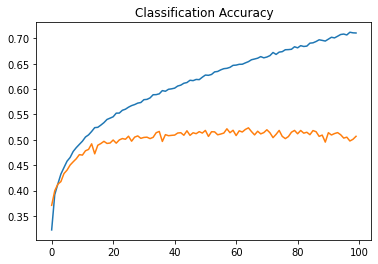

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## a. Stochastic mini batch based (Minibatch Gradient Descent)

### Batch_size=32

Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6630 - accuracy: 0.4143 - val_loss: 1.6695 - val_accuracy: 0.4185
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6141 - accuracy: 0.4329 - val_loss: 1.6266 - val_accuracy: 0.4271
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5732 - accuracy: 0.4478 - val_loss: 1.6137 - val_accuracy: 0.4359
Epoch 4/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5464 - accuracy: 0.4557 - val_loss: 1.6139 - val_accuracy: 0.4315
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5173 - accuracy: 0.4661 - val_loss: 1.5691 - val_accuracy: 0.4470
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4931 - accuracy: 0.4763 - val_loss: 1.5865 - val_accuracy: 0.4441
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4726 - accuracy: 0.4825 - val_loss: 1.5189 - val_ac

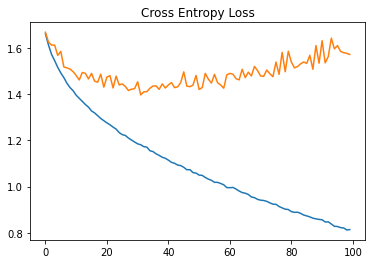

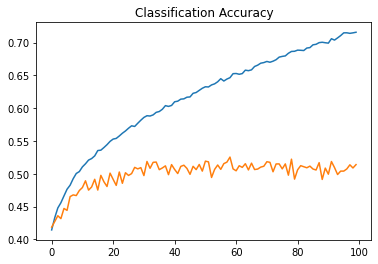

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Batch_size=64

Epoch 1/100
625/625 [==============================] - 4s 5ms/step - loss: 1.9481 - accuracy: 0.3043 - val_loss: 1.8443 - val_accuracy: 0.3580
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7820 - accuracy: 0.3737 - val_loss: 1.7696 - val_accuracy: 0.3855
Epoch 3/100
625/625 [==============================] - 3s 6ms/step - loss: 1.7199 - accuracy: 0.3961 - val_loss: 1.7201 - val_accuracy: 0.3943
Epoch 4/100
625/625 [==============================] - 3s 6ms/step - loss: 1.6705 - accuracy: 0.4142 - val_loss: 1.6930 - val_accuracy: 0.4145
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6334 - accuracy: 0.4279 - val_loss: 1.6647 - val_accuracy: 0.4179
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6058 - accuracy: 0.4381 - val_loss: 1.6506 - val_accuracy: 0.4211
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5805 - accuracy: 0.4471 - val_loss: 1.6249 - val_accuracy: 0.4347

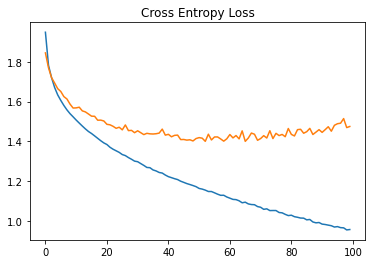

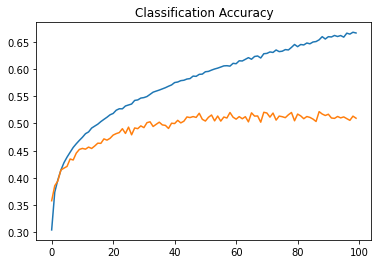

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Batch_size=256

Epoch 1/150
157/157 [==============================] - 3s 15ms/step - loss: 2.1054 - accuracy: 0.2462 - val_loss: 1.9858 - val_accuracy: 0.2963
Epoch 2/150
157/157 [==============================] - 2s 14ms/step - loss: 1.9305 - accuracy: 0.3279 - val_loss: 1.9102 - val_accuracy: 0.3320
Epoch 3/150
157/157 [==============================] - 2s 15ms/step - loss: 1.8677 - accuracy: 0.3504 - val_loss: 1.8638 - val_accuracy: 0.3496
Epoch 4/150
157/157 [==============================] - 2s 14ms/step - loss: 1.8281 - accuracy: 0.3665 - val_loss: 1.8349 - val_accuracy: 0.3625
Epoch 5/150
157/157 [==============================] - 2s 14ms/step - loss: 1.7994 - accuracy: 0.3783 - val_loss: 1.8125 - val_accuracy: 0.3731
Epoch 6/150
157/157 [==============================] - 2s 14ms/step - loss: 1.7760 - accuracy: 0.3874 - val_loss: 1.7955 - val_accuracy: 0.3794
Epoch 7/150
157/157 [==============================] - 2s 14ms/step - loss: 1.7560 - accuracy: 0.3937 - val_loss: 1.7791 - val_accuracy:

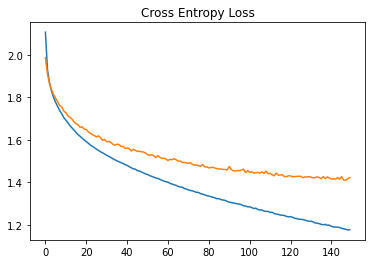

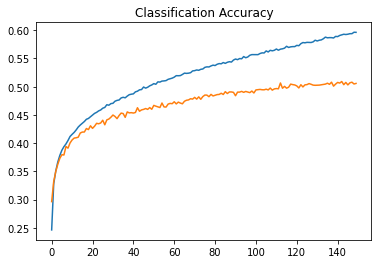

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 150, batch_size=256, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## b. Change activation functions

### 1.

Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 1.9412 - accuracy: 0.3095 - val_loss: 1.8406 - val_accuracy: 0.3570
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7992 - accuracy: 0.3669 - val_loss: 1.7954 - val_accuracy: 0.3787
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7441 - accuracy: 0.3925 - val_loss: 1.8055 - val_accuracy: 0.3637
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7075 - accuracy: 0.4046 - val_loss: 1.7209 - val_accuracy: 0.4007
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6777 - accuracy: 0.4183 - val_loss: 1.7006 - val_accuracy: 0.4095
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6470 - accuracy: 0.4278 - val_loss: 1.6824 - val_accuracy: 0.4168
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6234 - accuracy: 0.4349 - val_loss: 1.6689 - val_accuracy: 0.4198

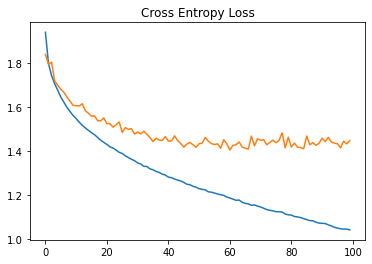

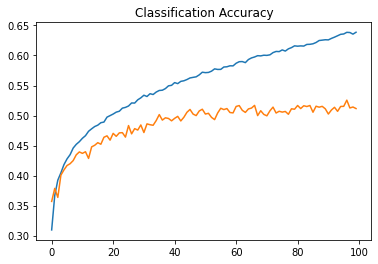

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'elu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Confusion matrix

Text(0.5, 69.0, 'Predictions')

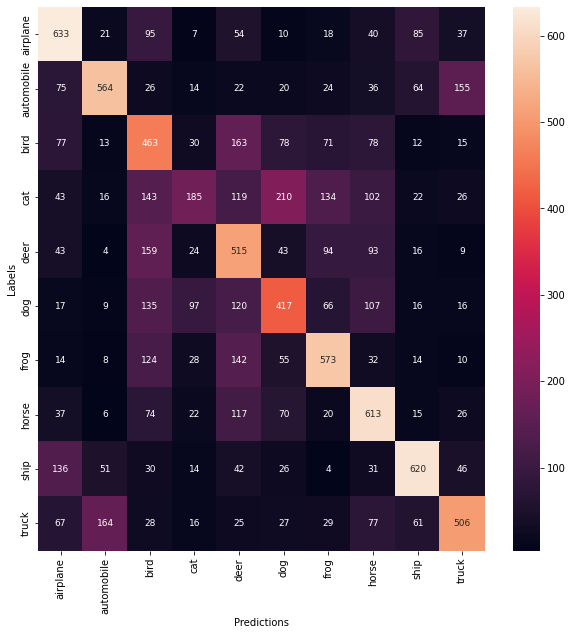

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

### 2.

Epoch 1/20
625/625 [==============================] - 4s 5ms/step - loss: 7.6621 - accuracy: 0.1006 - val_loss: 8.0526 - val_accuracy: 0.1003
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 8.0607 - accuracy: 0.0999 - val_loss: 8.0526 - val_accuracy: 0.1003
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 8.0607 - accuracy: 0.0999 - val_loss: 8.0526 - val_accuracy: 0.1003
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 8.0607 - accuracy: 0.0999 - val_loss: 8.0526 - val_accuracy: 0.1003
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 8.0607 - accuracy: 0.0999 - val_loss: 8.0526 - val_accuracy: 0.1003
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 8.0607 - accuracy: 0.0999 - val_loss: 8.0526 - val_accuracy: 0.1003
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 8.0607 - accuracy: 0.0999 - val_loss: 8.0526 - val_accuracy: 0.1003
Epoch 

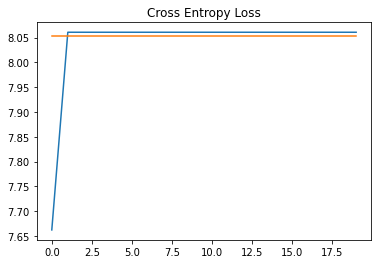

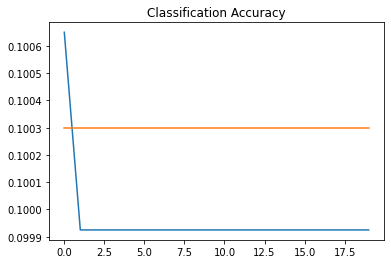

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'tanh'))     
model.add(Dense(64, activation = 'tanh'))     
model.add(Dense(10, activation = 'tanh'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 20, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Confusion matrix

Text(0.5, 69.0, 'Predictions')

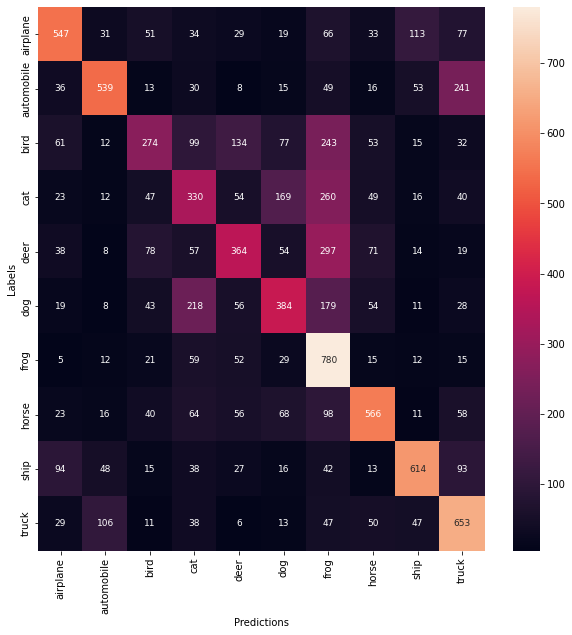

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

## c. Change loss function

In [ ]:
# MSE
# categorical_hinge

Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0903 - accuracy: 0.1316 - val_loss: 0.0889 - val_accuracy: 0.1659
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0879 - accuracy: 0.2024 - val_loss: 0.0871 - val_accuracy: 0.2226
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0863 - accuracy: 0.2385 - val_loss: 0.0858 - val_accuracy: 0.2435
Epoch 4/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0851 - accuracy: 0.2572 - val_loss: 0.0848 - val_accuracy: 0.2605
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0842 - accuracy: 0.2720 - val_loss: 0.0840 - val_accuracy: 0.2736
Epoch 6/100
625/625 [==============================] - 4s 7ms/step - loss: 0.0834 - accuracy: 0.2845 - val_loss: 0.0833 - val_accuracy: 0.2853
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0827 - accuracy: 0.2951 - val_loss: 0.0827 - val_accuracy: 0.2962

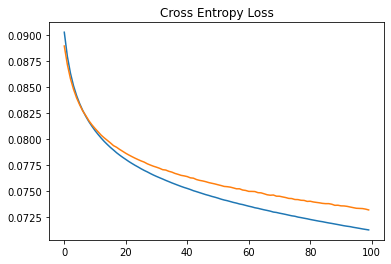

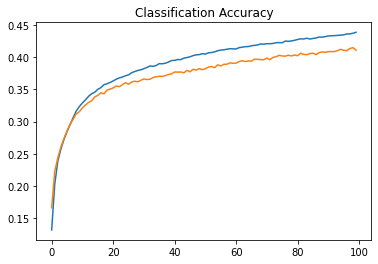

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'MSE', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Epoch 1/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0780 - accuracy: 0.1107 - val_loss: 1.0753 - val_accuracy: 0.1102
Epoch 2/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0733 - accuracy: 0.1406 - val_loss: 1.0708 - val_accuracy: 0.1762
Epoch 3/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0688 - accuracy: 0.1928 - val_loss: 1.0668 - val_accuracy: 0.2116
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0651 - accuracy: 0.2215 - val_loss: 1.0635 - val_accuracy: 0.2279
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 1.0623 - accuracy: 0.2335 - val_loss: 1.0612 - val_accuracy: 0.2346
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.0603 - accuracy: 0.2373 - val_loss: 1.0597 - val_accuracy: 0.2369
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 1.0588 - accuracy: 0.2394 - val_loss: 1.0585 - val_accuracy: 0.2388

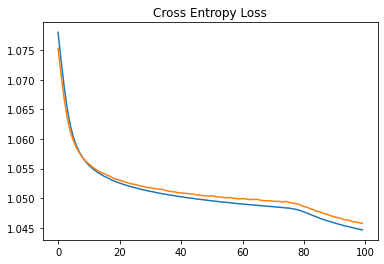

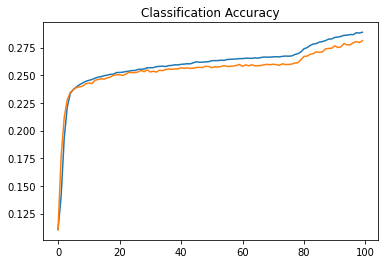

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'hinge', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Epoch 1/100
625/625 [==============================] - 5s 7ms/step - loss: 0.0837 - accuracy: 0.2882 - val_loss: 0.0822 - val_accuracy: 0.3108
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0772 - accuracy: 0.3599 - val_loss: 0.0771 - val_accuracy: 0.3633
Epoch 3/100
625/625 [==============================] - 4s 7ms/step - loss: 0.0753 - accuracy: 0.3849 - val_loss: 0.0757 - val_accuracy: 0.3778
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 0.0739 - accuracy: 0.4009 - val_loss: 0.0747 - val_accuracy: 0.3928
Epoch 5/100
625/625 [==============================] - 4s 7ms/step - loss: 0.0727 - accuracy: 0.4145 - val_loss: 0.0737 - val_accuracy: 0.4037
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0718 - accuracy: 0.4221 - val_loss: 0.0729 - val_accuracy: 0.4089
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0711 - accuracy: 0.4284 - val_loss: 0.0725 - val_accuracy: 0.4153

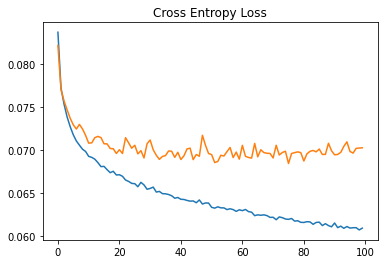

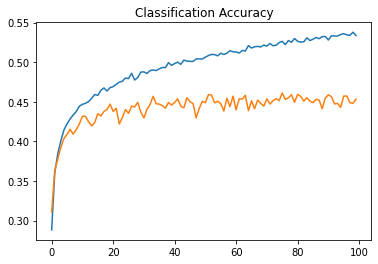

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'MSE', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Epoch 1/100
625/625 [==============================] - 5s 8ms/step - loss: 1.0799 - accuracy: 0.1004 - val_loss: 1.0805 - val_accuracy: 0.0977
Epoch 2/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0803 - accuracy: 0.0986 - val_loss: 1.0797 - val_accuracy: 0.1014
Epoch 3/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0801 - accuracy: 0.0997 - val_loss: 1.0797 - val_accuracy: 0.1014
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0801 - accuracy: 0.0997 - val_loss: 1.0797 - val_accuracy: 0.1014
Epoch 5/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0800 - accuracy: 0.1002 - val_loss: 1.0795 - val_accuracy: 0.1025
Epoch 6/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0726 - accuracy: 0.1370 - val_loss: 1.0697 - val_accuracy: 0.1520
Epoch 7/100
625/625 [==============================] - 4s 7ms/step - loss: 1.0685 - accuracy: 0.1578 - val_loss: 1.0679 - val_accuracy: 0.1606

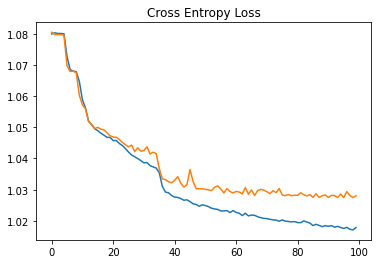

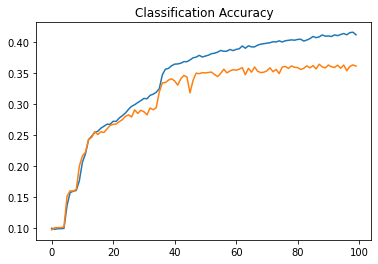

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'hinge', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## Recall, Precision and F-Score for our best model

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Epoch 1/100
625/625 [==============================] - 6s 8ms/step - loss: 1.9607 - accuracy: 0.2994 - recall: 0.0252 - precision: 0.6183 - f1_score: 0.0469 - val_loss: 1.8600 - val_accuracy: 0.3487 - val_recall: 0.0498 - val_precision: 0.6544 - val_f1_score: 0.0911
Epoch 2/100
625/625 [==============================] - 4s 7ms/step - loss: 1.7919 - accuracy: 0.3719 - recall: 0.0688 - precision: 0.6464 - f1_score: 0.1229 - val_loss: 1.7794 - val_accuracy: 0.3794 - val_recall: 0.0701 - val_precision: 0.6539 - val_f1_score: 0.1246
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 1.7238 - accuracy: 0.3973 - recall: 0.0985 - precision: 0.6763 - f1_score: 0.1702 - val_loss: 1.7251 - val_accuracy: 0.4010 - val_recall: 0.1012 - val_precision: 0.6751 - val_f1_score: 0.1736
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 1.6751 - accuracy: 0.4166 - recall: 0.1192 - precision: 0.6869 - f1_score: 0.2011 - val_loss: 1.6935 - val_accuracy: 0.4088 

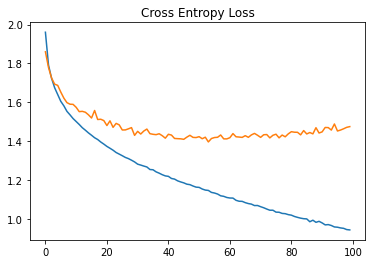

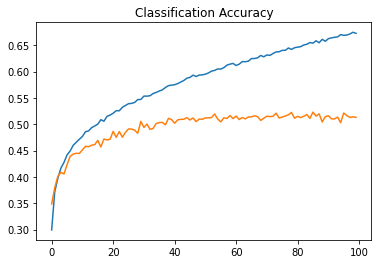

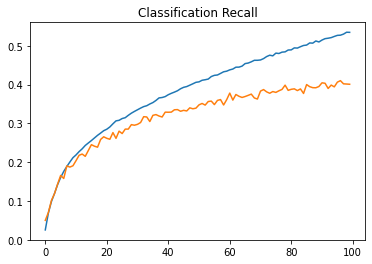

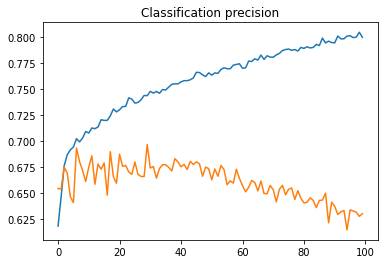

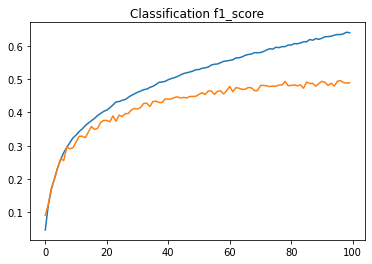

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy', 'Recall', 'Precision', f1_score])

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)
# plot Recall
plt.title('Classification Recall')
plt.plot(history.history['recall'], label='train')
plt.plot(history.history['val_recall'], label='test')
plt.show()
# plot precision
plt.title('Classification precision')
plt.plot(history.history['precision'], label='train')
plt.plot(history.history['val_precision'], label='test')
plt.show()
# plot f1_score
plt.title('Classification f1_score')
plt.plot(history.history['f1_score'], label='train')
plt.plot(history.history['val_f1_score'], label='test')
plt.show()

## Imbalanced Dataset

In [ ]:
(x_train  , y_train) , (x_test , y_test)  = tf.keras.datasets.cifar10.load_data()   
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = 10

### Delete half of airplanes and birds datas

In [ ]:
b = 2500

a = (y_train == 0).reshape(-1,) #airplane
np.random.seed(0)
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0)
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) 

a = (y_train == 2).reshape(-1,) #bird
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) # new y_train

num_train = x_train.shape[0]

In [ ]:
#shuffle dataset
indices = tf.range(start=0, limit=tf.shape(x_train)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

x_train = tf.gather(x_train, shuffled_indices).numpy()
y_train = tf.gather(y_train, shuffled_indices).numpy()

In [ ]:
# check shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))

x_train:	 (45000, 32, 32, 3)
y_train:	 (45000, 1)


In [ ]:
# train and test data with normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train,Test,Valid,One Hot
num_valid = int(0.2*x_train.shape[0])
num_train = x_train.shape[0]-num_valid

x_valid = x_train[num_train:]
y_valid = y_train[num_train:]

x_train = x_train[0:num_train]
y_train = y_train[0:num_train]

# one-hot encode the labels
y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid_hot = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# check final shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))
print('y_train_hot:\t {}\n'.format(y_train_hot.shape))

print('x_valid:\t {}'.format(x_valid.shape))
print('y_valid:\t {}'.format(y_valid.shape))
print('y_valid_hot:\t {}\n'.format(y_valid_hot.shape))

print('x_test:\t\t {}'.format(x_test.shape))
print('y_test:\t\t {}'.format(y_test.shape))
print('y_test_hot:\t {}'.format(y_test_hot.shape))

x_train:	 (36000, 32, 32, 3)
y_train:	 (36000, 1)
y_train_hot:	 (36000, 10)

x_valid:	 (9000, 32, 32, 3)
y_valid:	 (9000, 1)
y_valid_hot:	 (9000, 10)

x_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)
y_test_hot:	 (10000, 10)


Epoch 1/100
563/563 [==============================] - 5s 8ms/step - loss: 1.9429 - accuracy: 0.3133 - val_loss: 1.8202 - val_accuracy: 0.3670
Epoch 2/100
563/563 [==============================] - 5s 8ms/step - loss: 1.7788 - accuracy: 0.3793 - val_loss: 1.7556 - val_accuracy: 0.3966
Epoch 3/100
563/563 [==============================] - 5s 9ms/step - loss: 1.7125 - accuracy: 0.4080 - val_loss: 1.7315 - val_accuracy: 0.4056
Epoch 4/100
563/563 [==============================] - 5s 9ms/step - loss: 1.6654 - accuracy: 0.4249 - val_loss: 1.6817 - val_accuracy: 0.4157
Epoch 5/100
563/563 [==============================] - 5s 9ms/step - loss: 1.6285 - accuracy: 0.4398 - val_loss: 1.6532 - val_accuracy: 0.4287
Epoch 6/100
563/563 [==============================] - 5s 8ms/step - loss: 1.5960 - accuracy: 0.4475 - val_loss: 1.6531 - val_accuracy: 0.4227
Epoch 7/100
563/563 [==============================] - 5s 9ms/step - loss: 1.5694 - accuracy: 0.4601 - val_loss: 1.6218 - val_accuracy: 0.4414

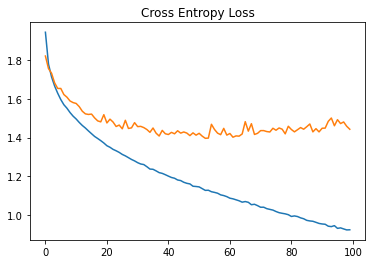

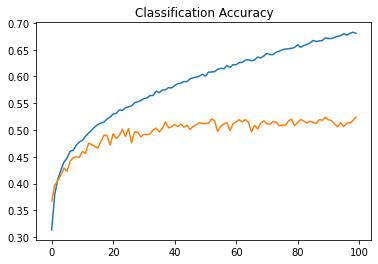

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Text(0.5, 69.0, 'Predictions')

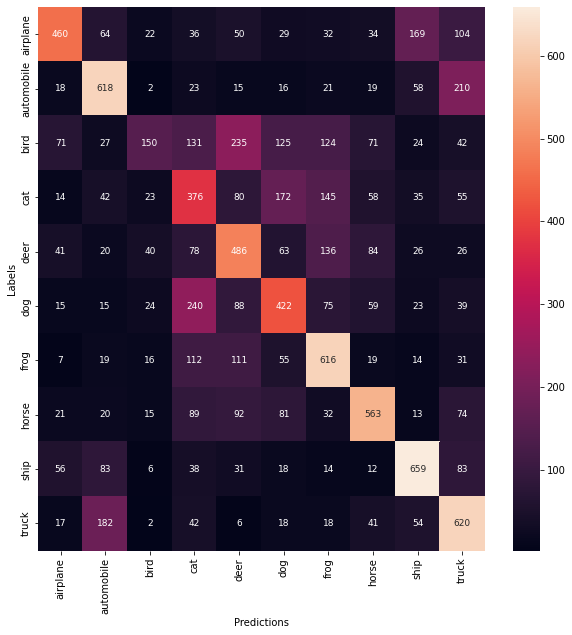

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

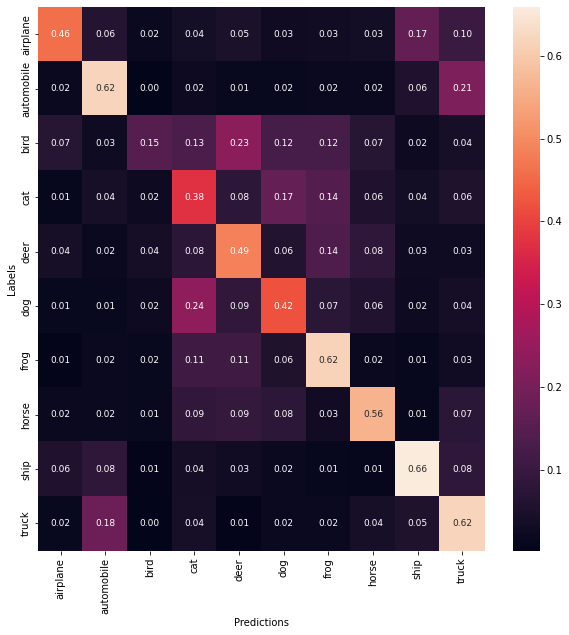

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

### Oversample the minority classes

In [ ]:
a = (y_train == 0).reshape(-1,)
x_train = np.concatenate((x_train[~a], np.tile(x_train[a],(2,1,1,1))), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], np.tile(y_train[a],(2,1))), axis=0) # new y_train

a = (y_train == 2).reshape(-1,)
x_train = np.concatenate((x_train[~a], np.tile(x_train[a],(2,1,1,1))), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], np.tile(y_train[a],(2,1))), axis=0) # new y_train

#shuffle dataset
indices = tf.range(start=0, limit=tf.shape(x_train)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

x_train = tf.gather(x_train, shuffled_indices).numpy()
y_train = tf.gather(y_train, shuffled_indices).numpy()
y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)

Epoch 1/100
626/626 [==============================] - 5s 7ms/step - loss: 1.9716 - accuracy: 0.2948 - val_loss: 1.8757 - val_accuracy: 0.3413
Epoch 2/100
626/626 [==============================] - 5s 8ms/step - loss: 1.8032 - accuracy: 0.3660 - val_loss: 1.7410 - val_accuracy: 0.3952
Epoch 3/100
626/626 [==============================] - 5s 7ms/step - loss: 1.7398 - accuracy: 0.3928 - val_loss: 1.6996 - val_accuracy: 0.4039
Epoch 4/100
626/626 [==============================] - 5s 8ms/step - loss: 1.6863 - accuracy: 0.4108 - val_loss: 1.6741 - val_accuracy: 0.4139
Epoch 5/100
626/626 [==============================] - 5s 8ms/step - loss: 1.6486 - accuracy: 0.4239 - val_loss: 1.6685 - val_accuracy: 0.4111
Epoch 6/100
626/626 [==============================] - 4s 7ms/step - loss: 1.6146 - accuracy: 0.4384 - val_loss: 1.6335 - val_accuracy: 0.4257
Epoch 7/100
626/626 [==============================] - 4s 6ms/step - loss: 1.5864 - accuracy: 0.4471 - val_loss: 1.5949 - val_accuracy: 0.4493

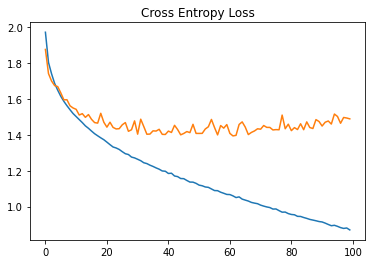

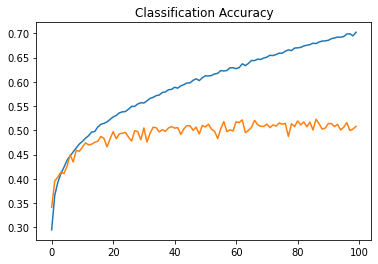

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Text(0.5, 69.0, 'Predictions')

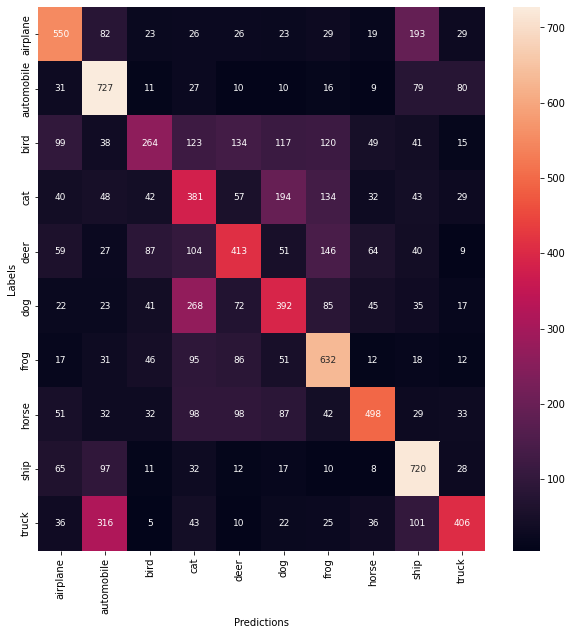

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

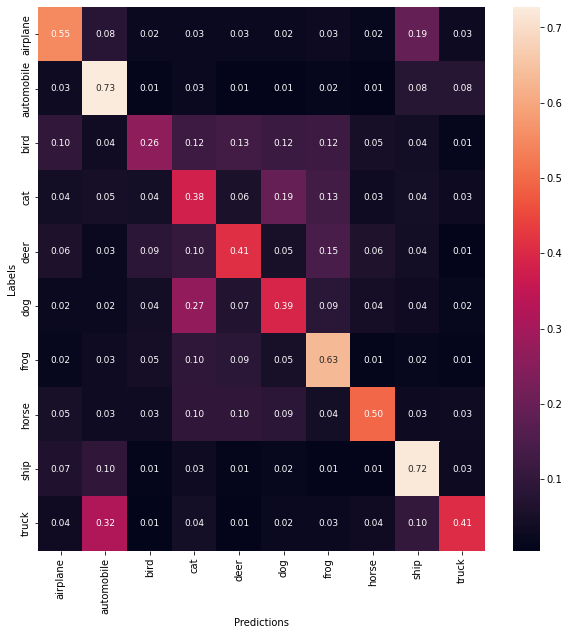

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

# CNN

## Add CNN layers

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
625/625 [==============================] - 56s 74ms/step - loss: 1.6740 - accuracy: 0.3999 - val_loss: 1.4402 - val_accuracy: 0.4853
Epoch 2/50
625/625 [==============================] - 45s 73ms/step - loss: 1.2757 - accuracy: 0.5455 - val_loss: 1.3313 - val_accuracy: 0.5263
Epoch 3/50
625/625 [==============================] - 47s 76ms/step - loss: 1.0745 - accuracy: 0.6196 - val_loss: 1.1294 - val_accuracy: 0.6086
Epoch 4/50
625/625 [==============================] - 45s 72ms/step - loss: 0.9031 - accuracy: 0.6858 - val_loss: 1.0535 - val_accuracy: 0.6338
Epoch 5/50
625/625 [==============================] - 45s 73ms/step - loss: 0.7516 - accuracy: 0.7391 - val_loss: 1.0137 - val_accuracy: 0.6521
Epoch 6/50
625/625 [==============================] - 47s 76ms/step - loss: 0.5740 - accuracy: 0.8029 - val_loss: 1.0486 - val_accuracy: 0.6538
Epoch 7/50
625/625 [==============================] - 45s 72ms/step - loss: 0.3901 - accuracy: 0.8697 - val_loss: 1.1575 - val_accuracy:

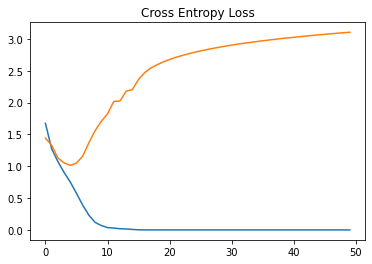

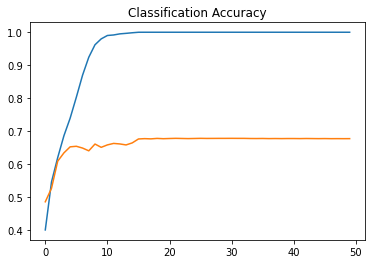

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	#model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	#model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	#model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	#model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()
# fit model
history = model.fit(x_train, y_train_hot, epochs=50, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)
# evaluate model
print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)
# learning curves
plot_curves(history)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
625/625 [==============================] - 15s 22ms/step - loss: 1.8364 - accuracy: 0.3376 - val_loss: 1.5533 - val_accuracy: 0.4357
Epoch 2/50
625/625 [==============================] - 13s 21ms/step - loss: 1.4640 - accuracy: 0.4737 - val_loss: 1.4357 - val_accuracy: 0.4881
Epoch 3/50
625/625 [==============================] - 14s 22ms/step - loss: 1.3126 - accuracy: 0.5330 - val_loss: 1.2905 - val_accuracy: 0.5380
Epoch 4/50
625/625 [==============================] - 13s 21ms/step - loss: 1.1925 - accuracy: 0.5768 - val_loss: 1.1989 - val_accuracy: 0.5761
Epoch 5/50
625/625 [==============================] - 13s 21ms/step - loss: 1.0974 - accuracy: 0.6136 - val_loss: 1.1423 - val_accuracy: 0.5970
Epoch 6/50
625/625 [==============================] - 14s 22ms/step - loss: 1.0121 - accuracy: 0.6435 - val_loss: 1.0566 - val_accuracy: 0.6329
Epoch 7/50
625/625 [==============================] - 13s 21ms/step - loss: 0.9356 - accuracy: 0.6728 - val_loss: 1.0760 - val_accuracy:

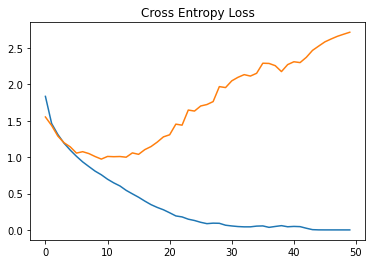

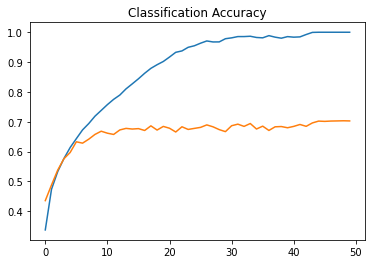

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	#model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()
# fit model
history = model.fit(x_train, y_train_hot, epochs=50, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)
# evaluate model
print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)
# learning curves
plot_curves(history)

## Add Batch normalization and Pooling layers

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
625/625 [==============================] - 17s 26ms/step - loss: 1.5054 - accuracy: 0.4641 - val_loss: 1.4147 - val_accuracy: 0.5040
Epoch 2/50
625/625 [==============================] - 16s 25ms/step - loss: 1.1014 - accuracy: 0.6041 - val_loss: 1.1667 - val_accuracy: 0.5863
Epoch 3/50
625/625 [==============================] - 16s 25ms/step - loss: 0.9146 - accuracy: 0.6765 - val_loss: 1.0509 - val_accuracy: 0.6238
Epoch 4/50
625/625 [==============================] - 16s 25ms/step - loss: 0.7844 - accuracy: 0.7226 - val_loss: 0.9884 - val_accuracy: 0.6584
Epoch 5/50
625/625 [==============================] - 16s 25ms/step - loss: 0.6714 - accuracy: 0.7653 - val_loss: 0.9352 - val_accuracy: 0.6786
Epoch 6/50
625/625 [==============================] - 15s 25ms/step - loss: 0.5783 - accuracy: 0.7978 - val_loss: 0.9466 - val_accuracy: 0.6779
Epoch 7/50
625/625 [==============================] - 16s 25ms/step - loss: 0.4797 - accuracy: 0.8350 - val_loss: 0.9868 - val_accuracy:

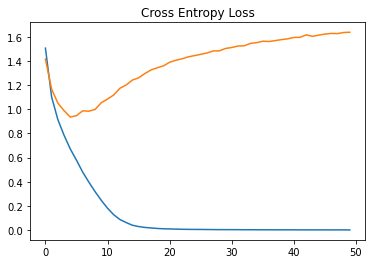

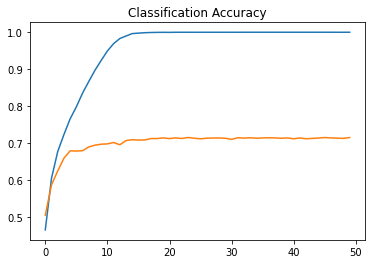

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	#model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train, y_train_hot, epochs=50, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## Add Drop out layer

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
625/625 [==============================] - 27s 28ms/step - loss: 1.8363 - accuracy: 0.3350 - val_loss: 1.5508 - val_accuracy: 0.4332
Epoch 2/100
625/625 [==============================] - 17s 27ms/step - loss: 1.4712 - accuracy: 0.4612 - val_loss: 1.5075 - val_accuracy: 0.4776
Epoch 3/100
625/625 [==============================] - 17s 27ms/step - loss: 1.3370 - accuracy: 0.5155 - val_loss: 1.3132 - val_accuracy: 0.5350
Epoch 4/100
625/625 [==============================] - 17s 27ms/step - loss: 1.2359 - accuracy: 0.5542 - val_loss: 1.1356 - val_accuracy: 0.5928
Epoch 5/100
625/625 [==============================] - 17s 27ms/step - loss: 1.1607 - accuracy: 0.5799 - val_loss: 1.1274 - val_accuracy: 0.6011
Epoch 6/100
625/625 [==============================] - 17s 27ms/step - loss: 1.0931 - accuracy: 0.6066 - val_loss: 1.0537 - val_accuracy: 0.6215
Epoch 7/100
625/625 [==============================] - 17s 27ms/step - loss: 1.0393 - accuracy: 0.6281 - val_loss: 0.9299 - val_ac

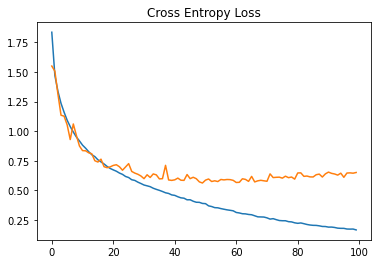

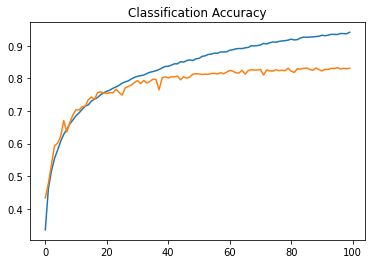

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train, y_train_hot, epochs=100, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## Confusion matrix

Text(0.5, 69.0, 'Predictions')

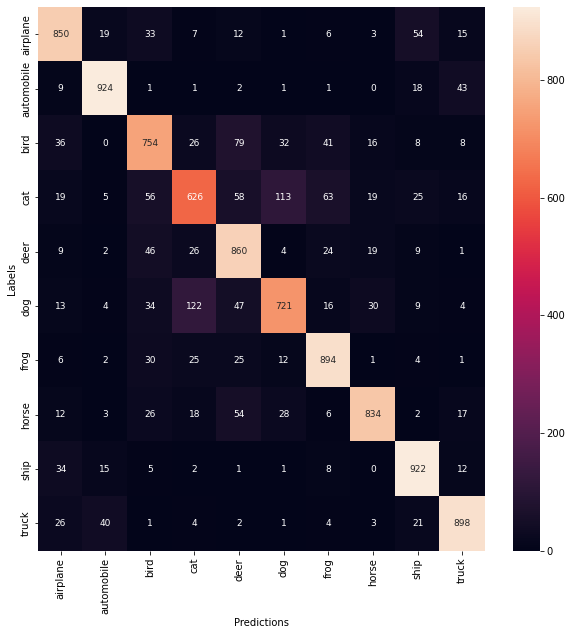

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

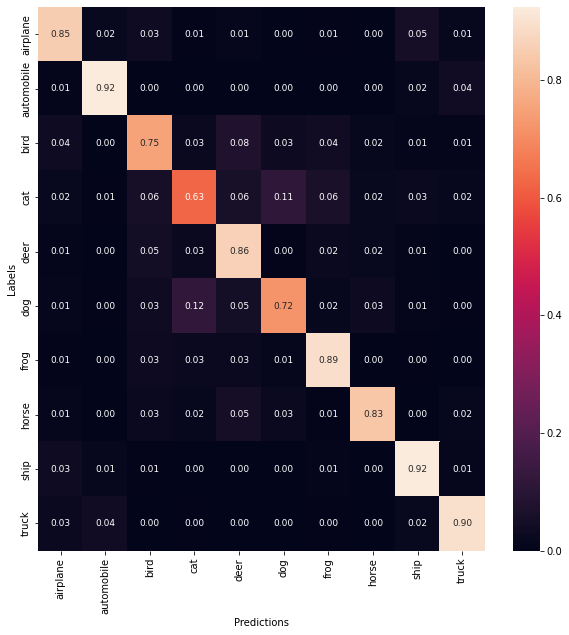

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
625/625 [==============================] - 18s 28ms/step - loss: 1.8085 - accuracy: 0.3435 - val_loss: 1.5693 - val_accuracy: 0.4344
Epoch 2/100
625/625 [==============================] - 17s 27ms/step - loss: 1.4417 - accuracy: 0.4737 - val_loss: 1.3571 - val_accuracy: 0.5206
Epoch 3/100
625/625 [==============================] - 17s 27ms/step - loss: 1.2991 - accuracy: 0.5311 - val_loss: 1.3105 - val_accuracy: 0.5367
Epoch 4/100
625/625 [==============================] - 17s 27ms/step - loss: 1.1957 - accuracy: 0.5694 - val_loss: 1.2761 - val_accuracy: 0.5649
Epoch 5/100
625/625 [==============================] - 17s 27ms/step - loss: 1.1231 - accuracy: 0.5955 - val_loss: 1.1726 - val_accuracy: 0.5910
Epoch 6/100
625/625 [==============================] - 17s 27ms/step - loss: 1.0620 - accuracy: 0.6210 - val_loss: 0.9964 - val_accuracy: 0.6452
Epoch 7/100
625/625 [==============================] - 17s 27ms/step - loss: 1.0084 - accuracy: 0.6385 - val_loss: 0.9479 - val_ac

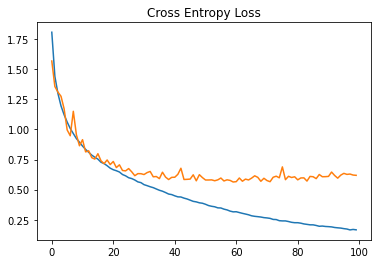

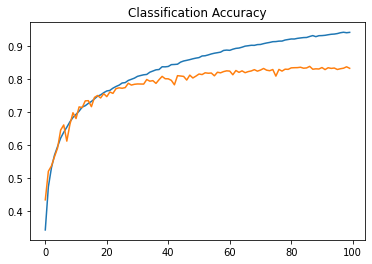

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train, y_train_hot, epochs=100, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## Confusion matrix

Text(0.5, 69.0, 'Predictions')

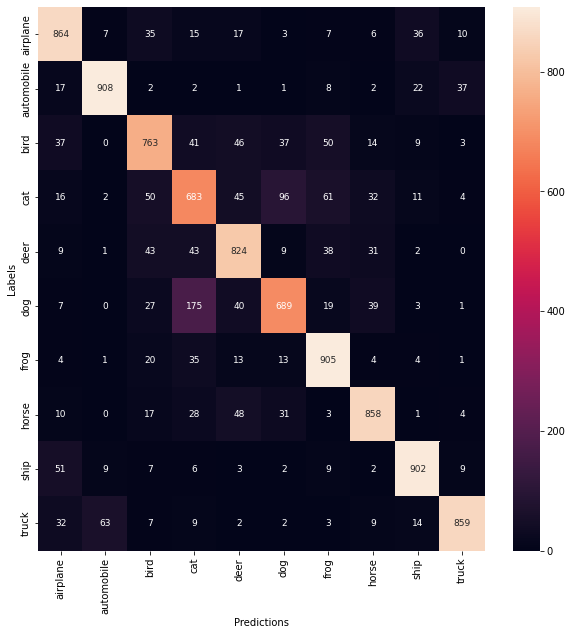

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

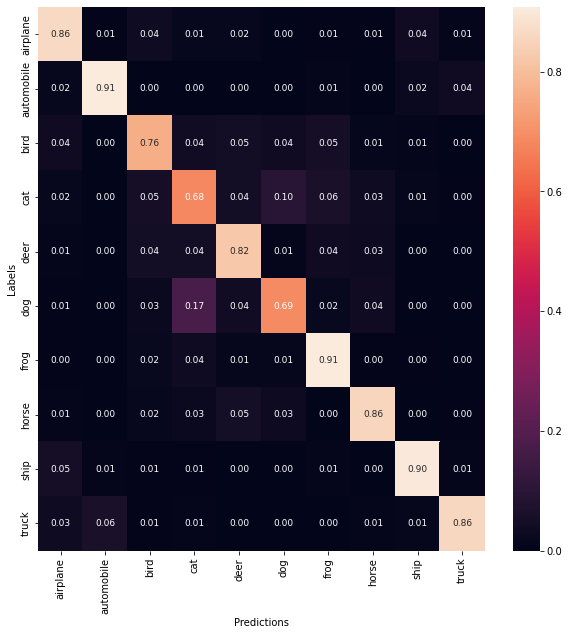

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

# Data Augmentation

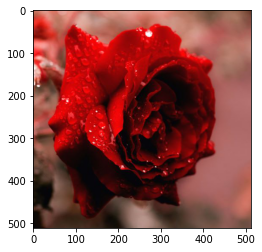

In [ ]:
image = img.imread('test.jpg')
# displaying the image
plt.imshow(image)

## Ten artificial examples

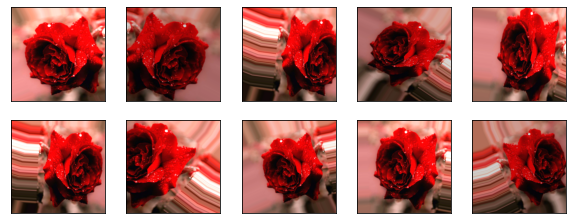

In [ ]:
# ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.8,1.2])  # brightness
image_exp = expand_dims(image, 0)
# iterator
aug_iter = datagen.flow(image_exp, batch_size=1)


# generate batch of images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = next(aug_iter)[0].astype('uint8')
    plt.imshow(image)
plt.show()

## Delete 90 percent of dogs and cats classes

In [ ]:
(x_train  , y_train) , (x_test , y_test)  = tf.keras.datasets.cifar10.load_data()   
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = 10

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
b = 500

a = (y_train == 3).reshape(-1,) #cat
np.random.seed(0)
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) # new y_train

a = (y_train == 5).reshape(-1,) #dog
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) # new y_train

num_train = x_train.shape[0]

In [ ]:
#shuffle dataset
indices = tf.range(start=0, limit=tf.shape(x_train)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

x_train = tf.gather(x_train, shuffled_indices).numpy()
y_train = tf.gather(y_train, shuffled_indices).numpy()

In [ ]:
# check shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))

x_train:	 (41000, 32, 32, 3)
y_train:	 (41000, 1)


In [ ]:
# train and test data with normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train,Test,Valid,One Hot
num_valid = int(0.2*x_train.shape[0])
num_train = x_train.shape[0]-num_valid

x_valid = x_train[num_train:]
y_valid = y_train[num_train:]

x_train = x_train[0:num_train]
y_train = y_train[0:num_train]

# one-hot encode the labels
y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid_hot = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# check final shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))
print('y_train_hot:\t {}\n'.format(y_train_hot.shape))

print('x_valid:\t {}'.format(x_valid.shape))
print('y_valid:\t {}'.format(y_valid.shape))
print('y_valid_hot:\t {}\n'.format(y_valid_hot.shape))

print('x_test:\t\t {}'.format(x_test.shape))
print('y_test:\t\t {}'.format(y_test.shape))
print('y_test_hot:\t {}'.format(y_test_hot.shape))

x_train:	 (32800, 32, 32, 3)
y_train:	 (32800, 1)
y_train_hot:	 (32800, 10)

x_valid:	 (8200, 32, 32, 3)
y_valid:	 (8200, 1)
y_valid_hot:	 (8200, 10)

x_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)
y_test_hot:	 (10000, 10)


## Train model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
513/513 [==============================] - 15s 26ms/step - loss: 1.6908 - accuracy: 0.3897 - val_loss: 1.5893 - val_accuracy: 0.4344
Epoch 2/100
513/513 [==============================] - 13s 25ms/step - loss: 1.3570 - accuracy: 0.5092 - val_loss: 1.4773 - val_accuracy: 0.4972
Epoch 3/100
513/513 [==============================] - 13s 25ms/step - loss: 1.2313 - accuracy: 0.5603 - val_loss: 1.2348 - val_accuracy: 0.5754
Epoch 4/100
513/513 [==============================] - 13s 25ms/step - loss: 1.1380 - accuracy: 0.5981 - val_loss: 1.1194 - val_accuracy: 0.6057
Epoch 5/100
513/513 [==============================] - 13s 25ms/step - loss: 1.0554 - accuracy: 0.6309 - val_loss: 1.0536 - val_accuracy: 0.6343
Epoch 6/100
513/513 [==============================] - 13s 25ms/step - loss: 0.9847 - accuracy: 0.6534 - val_loss: 1.0147 - val_accuracy: 0.6545
Epoch 7/100
513/513 [==============================] - 13s 25ms/step - loss: 0.9328 - accuracy: 0.6751 - val_loss: 0.8809 - val_ac

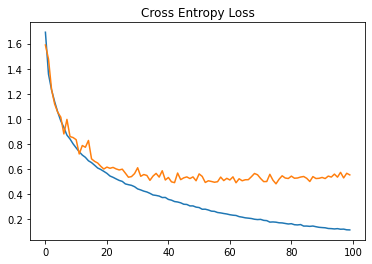

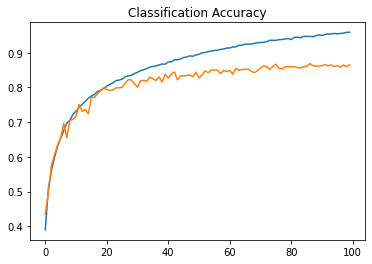

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train, y_train_hot, epochs=100, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## Confusion matrix

Text(0.5, 69.0, 'Predictions')

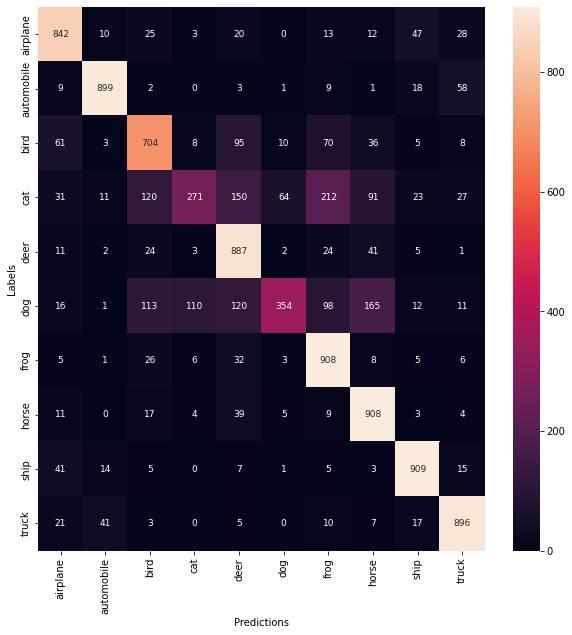

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

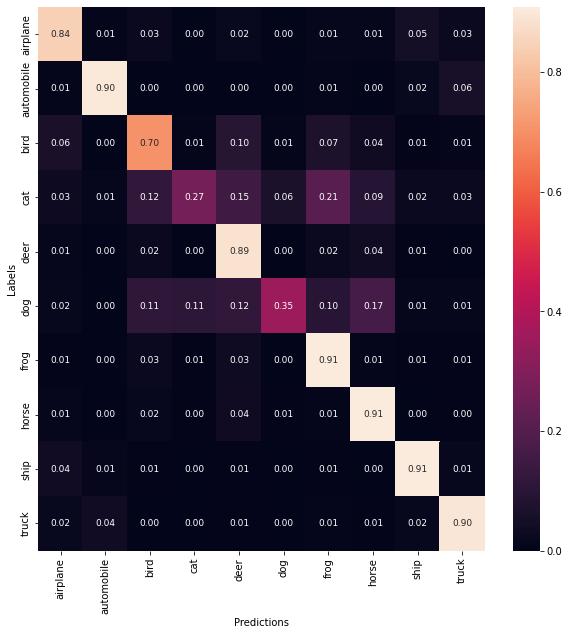

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

## Data Augmentation (cats and dogs)

In [ ]:
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.tensorflow import balanced_batch_generator


class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = min(batch_size, x.shape[0])
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])
        
    def __len__(self):
        return self.steps_per_epoch


    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

balanced_gen = BalancedDataGenerator(X_train, y_train, datagen, batch_size=64)
balanced_gen_val = BalancedDataGenerator(X_val, y_val, datagen, batch_size=64)
steps_per_epoch = balanced_gen.steps_per_epoch

In [ ]:
# Augmentation
train_datagen = ImageDataGenerator(rotation_range=0,  # rotation
                                   width_shift_range=0,  # horizontal shift
                                   zoom_range=0,  # zoom
                                   horizontal_flip=False,  # horizontal flip
                                   brightness_range=[1,1])  # brightness

# ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.8,1.2])  # brightness

datagen = ImageDataGenerator()                                   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
512/512 [==============================] - 64s 29ms/step - loss: 1.6966 - accuracy: 0.3932 - val_loss: 1.4120 - val_accuracy: 0.4868
Epoch 2/100
512/512 [==============================] - 15s 30ms/step - loss: 1.3300 - accuracy: 0.5185 - val_loss: 1.2340 - val_accuracy: 0.5637
Epoch 3/100
512/512 [==============================] - 14s 27ms/step - loss: 1.1840 - accuracy: 0.5756 - val_loss: 1.1073 - val_accuracy: 0.6028
Epoch 4/100
512/512 [==============================] - 14s 27ms/step - loss: 1.0721 - accuracy: 0.6226 - val_loss: 1.0506 - val_accuracy: 0.6438
Epoch 5/100
512/512 [==============================] - 14s 27ms/step - loss: 0.9960 - accuracy: 0.6516 - val_loss: 1.2126 - val_accuracy: 0.6001
Epoch 6/100
512/512 [==============================] - 14s 28ms/step - loss: 0.9369 - accuracy: 0.6726 - val_loss: 1.0831 - val_accuracy: 0.6360
Epoch 7/100
512/512 [==============================] - 15s 29ms/step - loss: 0.8890 - accuracy: 0.6905 - val_loss: 0.9132 - val_ac

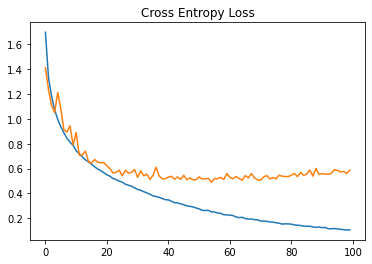

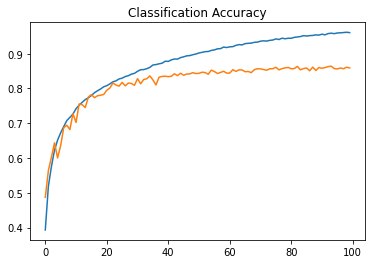

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

batch_size = 64
history = model.fit(datagen.flow(x_train,y_train_hot, batch_size=batch_size, seed=27, shuffle=False),
                    epochs=100,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_valid,y_valid_hot),
                    verbose=1)
print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
513/513 [==============================] - 15s 27ms/step - loss: 2.3341 - accuracy: 0.3294 - val_loss: 1.5495 - val_accuracy: 0.4543
Epoch 2/100
513/513 [==============================] - 13s 26ms/step - loss: 1.9239 - accuracy: 0.4423 - val_loss: 1.3622 - val_accuracy: 0.5190
Epoch 3/100
513/513 [==============================] - 13s 25ms/step - loss: 1.7580 - accuracy: 0.4940 - val_loss: 1.2548 - val_accuracy: 0.5621
Epoch 4/100
513/513 [==============================] - 13s 25ms/step - loss: 1.6517 - accuracy: 0.5289 - val_loss: 1.2151 - val_accuracy: 0.5813
Epoch 5/100
513/513 [==============================] - 13s 25ms/step - loss: 1.5563 - accuracy: 0.5603 - val_loss: 1.1469 - val_accuracy: 0.6032
Epoch 6/100
513/513 [==============================] - 13s 25ms/step - loss: 1.4734 - accuracy: 0.5901 - val_loss: 1.1357 - val_accuracy: 0.6116
Epoch 7/100
513/513 [==============================] - 13s 26ms/step - loss: 1.3736 - accuracy: 0.6137 - val_loss: 1.0284 - val_ac

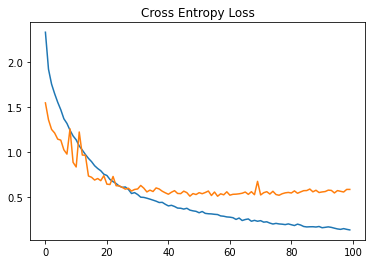

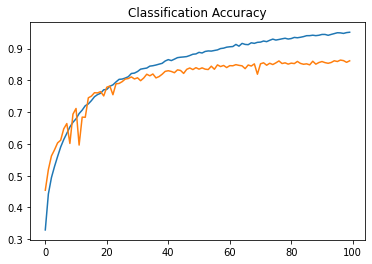

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

weights = {0:1 ,1:1 ,2:1 ,3:10, 4:1, 5:10, 6:1, 7:1, 8:1, 9:1}
history = model.fit(x_train, y_train_hot, epochs=100, batch_size=64, validation_data=(x_valid, y_valid_hot), class_weight=weights, verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## Confusion matrix

Text(0.5, 69.0, 'Predictions')

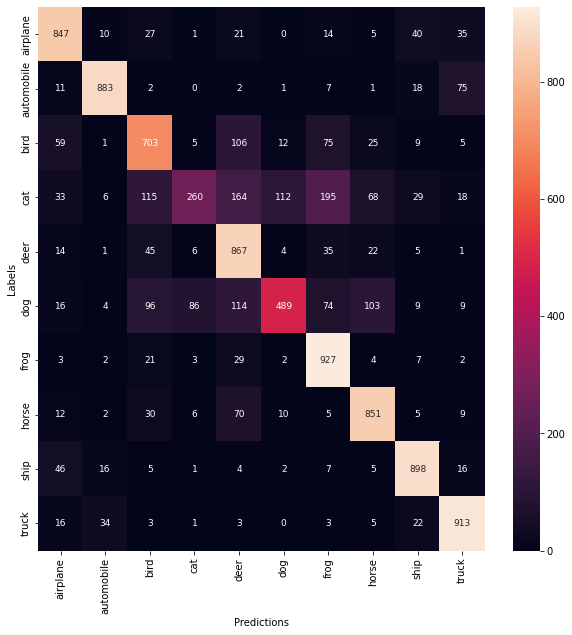

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

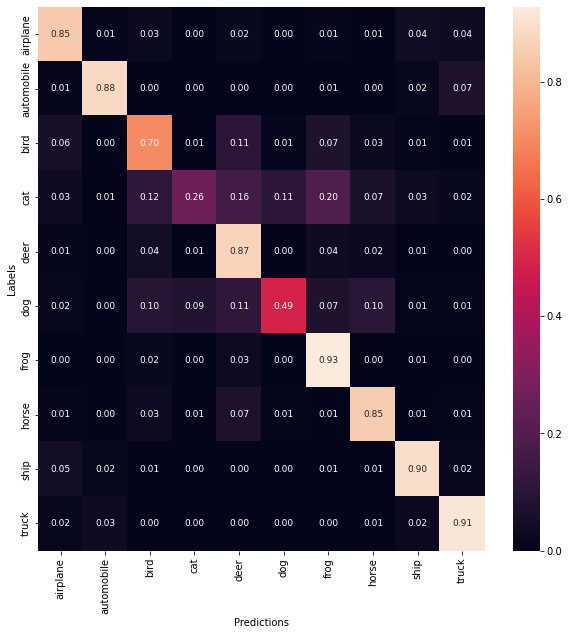

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

# Transfer learning (Extera 1)

## VGG16

In [ ]:
# Implement vgg16
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

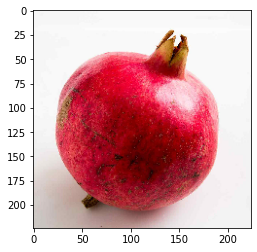

In [ ]:
image = load_img('anar.jpg', target_size=(224, 224))
plt.imshow(image)

image = tf.keras.preprocessing.image.img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

image = preprocess_input(image)
p = model.predict(image)
label = decode_predictions(p)

In [ ]:
# our labels
label[0][:3]

[('n07768694', 'pomegranate', 0.99127287),
 ('n07753113', 'fig', 0.0074562416),
 ('n07753592', 'banana', 0.0006549005)]

## Transfer learning on VGG16 model for two class dataset

In [ ]:
# two class = roses and sunflowers from tf_flowers dataset
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)


a0 = (train_labels == 2).numpy().reshape(-1,) #roses
a1 = (train_labels == 3).numpy().reshape(-1,) #sunflowers
num_rose = train_ds[a0].shape[0]
num_sunflow = train_ds[a1].shape[0]
train_ds = np.concatenate((train_ds[a0], train_ds[a1]), axis=0) # new train_ds
train_labels = np.concatenate((train_labels[a0], train_labels[a1]), axis=0) - 2 # new train_labels

a00 = (test_labels == 2).numpy().reshape(-1,) #roses
a11 = (test_labels == 3).numpy().reshape(-1,) #sunflowers
test_ds = np.concatenate((test_ds[a00], test_ds[a11]), axis=0) # new test_ds
test_labels = np.concatenate((test_labels[a00], test_labels[a11]), axis=0) - 2 # new test_labels

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
# check shape 
print('x_train:\t {}'.format(train_ds.shape))
print('y_train:\t {}\n'.format(train_labels.shape))

print('x_test:\t\t {}'.format(test_ds.shape))
print('y_test:\t\t {}\n'.format(test_labels.shape))

print('Number of roses:\t {}'.format(num_rose))
print('Number of sunflowers:\t {}'.format(num_sunflow))

x_train:	 (1027, 150, 150, 3)
y_train:	 (1027, 2)

x_test:		 (429, 150, 150, 3)
y_test:		 (429, 2)

Number of roses:	 531
Number of sunflowers:	 496


In [ ]:
## Loading VGG16 model
# We use Include_top=False to remove the classification layer that was trained on the ImageNet dataset and set the model as not trainable
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape) 
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_ds, train_labels, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/10
26/26 [==============================] - 7s 228ms/step - loss: 0.1559 - accuracy: 0.9488 - val_loss: 0.5772 - val_accuracy: 0.9078
Epoch 2/10
26/26 [==============================] - 5s 212ms/step - loss: 0.0963 - accuracy: 0.9732 - val_loss: 1.5334 - val_accuracy: 0.8204
Epoch 3/10
26/26 [==============================] - 5s 212ms/step - loss: 0.0775 - accuracy: 0.9842 - val_loss: 0.7752 - val_accuracy: 0.9029
Epoch 4/10
26/26 [==============================] - 5s 211ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 1.8773 - val_accuracy: 0.8689
Epoch 5/10
26/26 [==============================] - 5s 212ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 1.6224 - val_accuracy: 0.8592
Epoch 6/10
26/26 [==============================] - 6s 213ms/step - loss: 0.0084 - accuracy: 0.9963 - val_loss: 1.6369 - val_accuracy: 0.8883


In [ ]:
model.evaluate(test_ds, test_labels)

14/14 [==============================] - 2s 164ms/step - loss: 0.1848 - accuracy: 0.9650


[0.18481914699077606, 0.9650349617004395]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


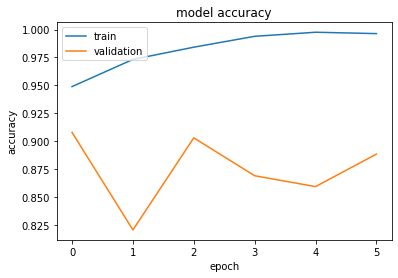

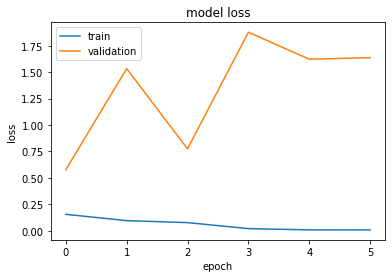

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# DeepPose(Extera 2)

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
cd 'drive/MyDrive/Colab Notebooks/DL/HW2/lsp_dataset'

/content/drive/MyDrive/Colab Notebooks/DL/HW2/lsp_dataset


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import skimage.transform
import torch
from torch.utils.data import DataLoader
import torch.nn as nn

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.autograd.set_detect_anomaly(True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [9]:
# Build Dataset
class LSP_Dataset(torch.utils.data.Dataset):
  
  def __init__(self, path="."): #/content/drive/My Drive
    self.path = path

    imgs_list = sorted(os.listdir(os.path.join(path, "images")))
    
    # Load joints data from the mat file
    self.joint_data = scipy.io.loadmat(os.path.join(path, "joints.mat"))["joints"]
    
    self.dataset_size = self.joint_data.shape[2]
    
    assert len(imgs_list) == self.dataset_size

    self.max_h, self.max_w = 196, 196

    # Load and store images (float) into a list
    self.array_of_images = np.empty([self.dataset_size, self.max_h, self.max_w, 3], dtype=float) # (2000,196,196,3)
    self.array_of_labels = np.empty([self.dataset_size, 3, 14], dtype=float) #N x (X,Y) x (14 joints) = (2000,2,14)
    
    for file_idx, file_name in enumerate(imgs_list):
      img, labels = self.scale_and_pad( plt.imread(os.path.join(path, "images", file_name)), self.joint_data[:2,:,file_idx])
      
      self.array_of_images[file_idx] = img
      self.array_of_labels[file_idx, :2, :] = labels
      self.array_of_labels[file_idx, 2, :]  = self.joint_data[2, :, file_idx]
    
  def scale_and_pad(self, img, labels):
    scale_factor = self.max_h/max(*img.shape)

    scaled_img = skimage.transform.rescale(img, scale=scale_factor, multichannel=True)

    img_h, img_w, _   = scaled_img.shape
    padded_scaled_img = np.zeros([self.max_h, self.max_w, 3])
    start_h, start_w  = int((self.max_h - img_h)/2), int((self.max_w - img_w)/2)

    padded_scaled_img[start_h:start_h + img_h, start_w:start_w + img_w, :] = scaled_img
    padded_scaled_labels = (labels*scale_factor + np.array([[start_w], [start_h]]))/self.max_h - 0.5
    return padded_scaled_img, padded_scaled_labels
    
  def __getitem__(self,idx):
    return self.array_of_images[idx], self.array_of_labels[idx]

  def __len__(self):
    return self.array_of_images.shape[0]

In [10]:
class DeepPose(nn.Module):
    def __init__(self):
        super(DeepPose,self).__init__()

        # CNN k 11*11, c 3 -> 96, stride 4,4
        # lrn 2, 2e-05, 0.75 
        # maxpooling k3*3, stride 2,2
        # CNN k 5*5, c -> 256 stride 1,1
        # lrn 2, 2e-05, 0.75
        # maxpooling k 3*3, stride 2,2
        # CNN k 3*3, c -> 384
        # CNN k 3*3, c -> 384
        # CNN k 3*3, c -> 256
        # Dense -> 4096
        # Dense -> 4096
        # Output layer -> num_classes
        
        # not reusing ReLU and dropout layer objects - lessons learnt from quantization
        # https://discuss.pytorch.org/t/using-same-dropout-object-for-multiple-drop-out-layers/39027/6

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)
        self.relu_conv1 = nn.ReLU(inplace=True)
        self.lrn1  = nn.LocalResponseNorm(size=2, alpha=2e-05, beta=0.75, k=1)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=0)
        self.relu_conv2 = nn.ReLU(inplace=True)
        self.lrn2  = nn.LocalResponseNorm(size=2, alpha=2e-05, beta=0.75, k=1)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=0)
        
        self.relu_conv3 = nn.ReLU(inplace=True)
        
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=0)
        self.relu_conv4 = nn.ReLU(inplace=True)
        
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=0)
        self.relu_conv5 = nn.ReLU(inplace=True)
        
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.fc1 = nn.Linear(in_features=256, out_features=4096)
        self.relu_fc1 = nn.ReLU(inplace=True)
        self.dropout_fc1 = nn.Dropout(p=0.6)
        
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.relu_fc2 = nn.ReLU(inplace=True)
        self.dropout_fc2 = nn.Dropout(p=0.6)
        
        self.out = nn.Linear(in_features=4096, out_features=28)
        
    def forward(self,input):
        x = input.view((input.shape[0],input.shape[3],input.shape[1],input.shape[2]))
        x = self.pool1(self.lrn1(self.relu_conv1(self.conv1(x))))
        x = self.pool2(self.lrn2(self.relu_conv2(self.conv2(x))))
        x = self.relu_conv3(self.conv3(x))
        x = self.relu_conv4(self.conv4(x))
        x = self.pool3(self.relu_conv5(self.conv5(x)))
        x = torch.flatten(x,1)
        x = self.dropout_fc1(self.relu_fc1(self.fc1(x)))
        x = self.dropout_fc2(self.relu_fc2(self.fc2(x)))
        x = self.out(x)

        return x

In [11]:
def eval_relaxed_pcp(gt_joints, predicted_joints, thresh=0.5):
    """
    Relaxed PCP as in DeepPose paper.
    Compute average relaxed pcp per stick.
    Args:
      gt_joints, predicted_joints: arrays of gt and predicted joints in the canonical order
      thresh: fraction of the gt stick length. This is the maximal average deviation of the
        predicted joints of the stick from the gt joints position of the stick.
    Returns:
        pcp_per_stick: array of pcp scores. i-th element is the pcp score for the i-th stick
    """
    num_examples = len(gt_joints)
    # the number of sticks for a pose
    num_sticks = gt_joints[0].shape[0]
    is_matched = np.zeros((num_examples, num_sticks), dtype=int)
    
    #gt_joints = gt_joints.cpu()
    #predicted_joints = predicted_joints.cpu()

    for i in range(num_examples):
        for stick_id in range(num_sticks):
            gt_stick_len = np.linalg.norm(gt_joints[i]['sticks'][stick_id, :2] -
                                          gt_joints[i]['sticks'][stick_id, 2:])
            delta_a = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, :2] -
                                     gt_joints[i]['sticks'][stick_id, :2]) / gt_stick_len
            delta_b = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, 2:] -
                                     gt_joints[i]['sticks'][stick_id, 2:]) / gt_stick_len
            delta = (delta_a + delta_b) / 2.0

            is_matched[i, stick_id] = delta <= thresh
    pcp_per_stick = np.mean(is_matched, 0)
    return pcp_per_stick

In [12]:
import numpy as np


def project_joint_onto_original_image(joints, original_bbox=[0,0,196,196]):
    """
    Args:
      joints: 2D array [num_joints x 2] of joints with normalized coordinates.
        Normalized coordinates (0,0) is  the center of the bbox.
        Bbox top left is (-0.5, -0.5), bottom right is (0.5, 0.5).
      original_bbox: array [x, y, w, h] - bbox coordinates (in pixels) on the original full size image.
    Returns:
      projected_joints: in pixel coordinates
    """
    #original_bbox = original_bbox.astype(int)
    #x, y, w, h = original_bbox
    x = 0
    y = 0
    w = 196
    h = 196
    projected_joints = np.array(joints, dtype=np.float32)
    projected_joints += np.array([0.5, 0.5])
    projected_joints[:, 0] *= w
    projected_joints[:, 1] *= h
    projected_joints += np.array([x, y])
    return projected_joints

In [13]:
def joints2sticks(joints):
    """
    Args:
        joints: array of joints in the canonical order.
      The canonical joint order:
        0 Head top
        1 Neck
        2 Right shoulder (from person's perspective)
        3 Right elbow
        4 Right wrist
        5 Right hip
        6 Right knee
        7 Right ankle
        8 Left shoulder
        9 Left elbow
        10 Left wrist
        11 Left hip
        12 Left knee
        13 Left ankle
    Returns:
        sticks: array of sticks in the canonical order.
      The canonical part stick order:
        0 Head
        1 Torso
        2 Right Upper Arm
        3 Right Lower Arm
        4 Right Upper Leg
        5 Right Lower Leg
        6 Left Upper Arm
        7 Left Lower Arm
        8 Left Upper Leg
        9 Left Lower Leg
    """
    assert joints.shape == (14, 2)
    stick_n = 10  # number of stick
    sticks = np.zeros((stick_n, 4), dtype=np.float32)
    sticks[0, :] = np.hstack([joints[0, :], joints[1, :]])  # Head
    sticks[1, :] = np.hstack([(joints[2, :] + joints[8, :]) / 2.0,
                             (joints[5, :] + joints[11, :]) / 2.0])  # Torso
    sticks[2, :] = np.hstack([joints[2, :], joints[3, :]])  # Left U.arms
    sticks[3, :] = np.hstack([joints[3, :], joints[4, :]])  # Left L.arms
    sticks[4, :] = np.hstack([joints[5, :], joints[6, :]])  # Left U.legs
    sticks[5, :] = np.hstack([joints[6, :], joints[7, :]])  # Left L.legs
    sticks[6, :] = np.hstack([joints[8, :], joints[9, :]])  # Right U.arms
    sticks[7, :] = np.hstack([joints[9, :], joints[10, :]])  # Right L.arms
    sticks[8, :] = np.hstack([joints[11, :], joints[12, :]])  # Right U.legs
    sticks[9, :] = np.hstack([joints[12, :], joints[13, :]])  # Right L.legs
    return sticks

In [14]:
def convert2canonical(joints):
    """
    Convert joints to evaluation structure.
    Permute joints according to the canonical joint order.
    """
    assert joints.shape[1:] == (14, 2), 'LSP must contain 14 joints per person'
    # convert to the canonical joint order
    joint_order = [13,  # Head top
                   12,  # Neck
                   8,   # Right shoulder
                   7,   # Right elbow
                   6,   # Right wrist
                   2,   # Right hip
                   1,   # Right knee
                   0,   # Right ankle
                   9,   # Left shoulder
                   10,  # Left elbow
                   11,  # Left wrist
                   3,   # Left hip
                   4,   # Left knee
                   5]   # Left ankle
    canonical = [dict() for _ in range(joints.shape[0])]
    for i in range(joints.shape[0]):
        canonical[i]['joints'] = joints[i, joint_order, :]
        canonical[i]['sticks'] = joints2sticks(canonical[i]['joints'])
    return canonical

In [15]:
def eval_strict_pcp(gt_joints, predicted_joints, thresh=0.5):
    """
    Compute average pcp per stick
    Args:
      gt_joints, predicted_joints: arrays of gt and predicted joints in the canonical order
      thresh: fraction of the gt stick length. This is the maximal deviation of the
        predicted joint from the gt joint position.
    Returns:
        pcp_per_stick: array of pcp scores. i-th element is the pcp score for the i-th stick
    """
    num_examples = len(gt_joints) # 16
    # print(gt_joints.size()) # torch.Size([16, 14, 2])
    # print(gt_joints[0]) # ozv 0 -> 14 * 2
    # the number of sticks for a pose
    num_sticks = gt_joints[0]['sticks'].shape[0] # 14
    is_matched = np.zeros((num_examples, num_sticks), dtype=int)

    #gt_joints = gt_joints.cpu()
    #predicted_joints = predicted_joints.cpu()

    #print(num_examples, num_sticks)

    for i in range(num_examples):
        for stick_id in range(num_sticks):
            gt_stick_len = np.linalg.norm(gt_joints[i]['sticks'][stick_id, :2] -
                                          gt_joints[i]['sticks'][stick_id, 2:])
            #print(gt_stick_len)
            delta_a = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, :2] -
                                            gt_joints[i]['sticks'][stick_id, :2]) / gt_stick_len
            delta_b = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, 2:] -
                                            gt_joints[i]['sticks'][stick_id, 2:]) / gt_stick_len

            is_matched[i, stick_id] = (delta_a <= thresh and delta_b <= thresh)
    pcp_per_stick = np.mean(is_matched, 0)
    return pcp_per_stick

In [16]:
def train(epochs, model, train_dl, val_dl, optimizer, criterion, train_size, val_size):
  train_loss_lst, val_loss_lst, batch_epoch_loss_lst = [], [], []


  val_pcp = []


  for e in range(epochs):
    train_loss, val_loss = 0, 0
    
    # Training
    model.train()
    for batch_idx,(batch_imgs, batch_labels) in enumerate(train_dl):
      optimizer.zero_grad()
      batch_imgs,batch_labels = batch_imgs.float().to(device),batch_labels.to(device)
      output = model(batch_imgs)
      
      batch_labels = batch_labels[:, :2, :].permute((0,2,1))
      # print(output.shape, batch_labels.shape)
      # Reshape the outputs of shape (batch_size x 28) -> (batch_size x 14 x 2)
      output = output.view(batch_labels.shape)
      
      loss = criterion(output, batch_labels.float())
      batch_epoch_loss_lst.append(loss.item())
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
      
    
    train_loss_lst.append(train_loss/train_size)
    
    # Validation
    model.eval()
    for batch_idx,(batch_imgs,batch_labels) in enumerate(val_dl):
      batch_imgs, batch_labels = batch_imgs.float().to(device),batch_labels.to(device)
      output = model(batch_imgs)
      
      batch_labels = batch_labels[:, :2, :].permute((0,2,1))
      # Reshape the outputs of shape (batch_size x 28) -> (batch_size x 14 x 2)
      output = output.view(batch_labels.shape)
      loss = criterion(output, batch_labels.float())
      val_loss += loss.item()

      

    val_loss_lst.append(val_loss/val_size)
    

    pcp_per_stick = calculate_metric(output, batch_labels.float(), metric_name='PCP')  
    val_pcp.append(pcp_per_stick)
    #print(pcp_per_stick)

    print("[{}/{}]: Train loss={:2.4f}, Validation loss={:2.4f}".format(e+1,epochs,train_loss_lst[-1],val_loss_lst[-1]))

    if train_loss_lst[-1]<=0.25:
      for param in optimizer.param_groups:
        param["lr"]=5e-4

    if train_loss_lst[-1]<=0.15:
      for param in optimizer.param_groups:
        param["lr"]=1e-4

  return train_loss_lst, val_loss_lst, batch_epoch_loss_lst, val_pcp

In [17]:
def calculate_metric(gt_joints, predicted_joints, orig_bboxes=[0,0,196,196], metric_name='PCP'):

    gt_joints = gt_joints.cpu().detach().numpy()
    predicted_joints = predicted_joints.cpu().detach().numpy()

    predicted_joints = np.clip(predicted_joints, -0.5, 0.5)
    # convert joints
    #print(gt_joints.shape[0])
    for i in range(gt_joints.shape[0]):
        gt_joints[i, ...] = project_joint_onto_original_image(gt_joints[i], orig_bboxes)
        predicted_joints[i, ...] = project_joint_onto_original_image(predicted_joints[i], orig_bboxes)

    gt_joints = convert2canonical(gt_joints)
    predicted_joints = convert2canonical(predicted_joints)
    if metric_name == 'PCP':
        full_scores = eval_strict_pcp(gt_joints, predicted_joints)
    return full_scores

In [18]:
lsp_dataset = LSP_Dataset()
dataset = torch.utils.data.ConcatDataset([lsp_dataset]) 

batch_size = 16
total = len(dataset)
train_size, val_size, test_size = int(total*0.7), int(total*0.15), int(total*0.15)

lengths = [train_size, val_size, test_size]
train_dataset, val_dataset, test_dataset = torch.utils.data.dataset.random_split(dataset, lengths)

train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dl   = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_dl  = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

model = DeepPose().float().to(device)

criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adagrad(model.parameters(),lr=1e-3)

In [ ]:
train_loss_lst, val_loss_lst, batch_epoch_loss_lst, val_pcp = train( epochs=50, 
                                                              model=model, 
                                                              train_dl=train_dl, 
                                                              val_dl=val_dl, 
                                                              optimizer=optimizer, 
                                                              criterion=criterion, 
                                                              train_size=train_size, 
                                                              val_size=val_size)

[1/50]: Train loss=0.4290, Validation loss=0.3224
[2/50]: Train loss=0.3747, Validation loss=0.3157
[3/50]: Train loss=0.3651, Validation loss=0.3084
[4/50]: Train loss=0.3628, Validation loss=0.3076
[5/50]: Train loss=0.3592, Validation loss=0.3152
[6/50]: Train loss=0.3572, Validation loss=0.3187
[7/50]: Train loss=0.3557, Validation loss=0.3192
[8/50]: Train loss=0.3522, Validation loss=0.3103
[9/50]: Train loss=0.3518, Validation loss=0.3138
[10/50]: Train loss=0.3484, Validation loss=0.3123
[11/50]: Train loss=0.3476, Validation loss=0.3021
[12/50]: Train loss=0.3448, Validation loss=0.3139
[13/50]: Train loss=0.3425, Validation loss=0.3052
[14/50]: Train loss=0.3377, Validation loss=0.3034
[15/50]: Train loss=0.3414, Validation loss=0.3040
[16/50]: Train loss=0.3354, Validation loss=0.3075
[17/50]: Train loss=0.3346, Validation loss=0.3037


In [ ]:
plt.plot(train_loss_lst)
plt.plot(val_loss_lst)

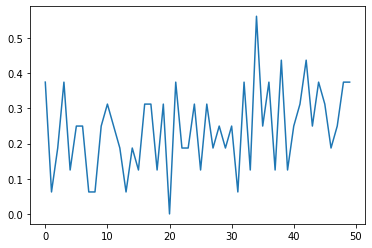

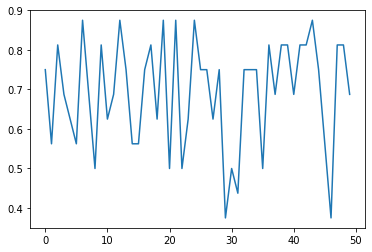

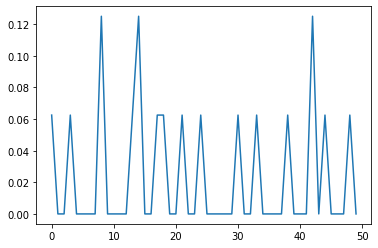

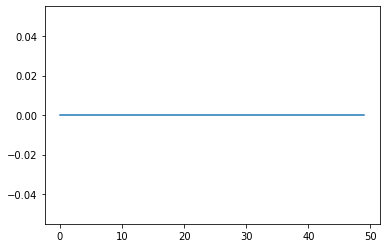

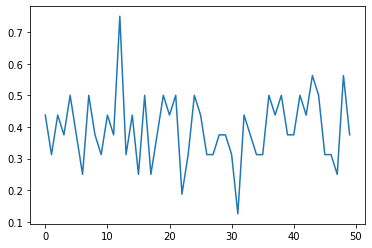

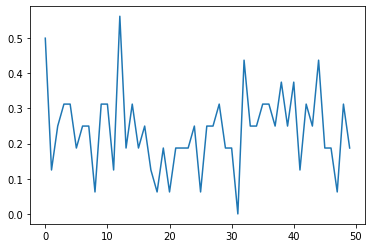

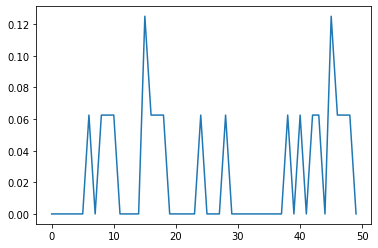

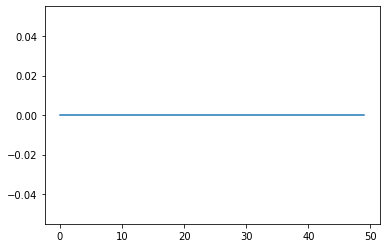

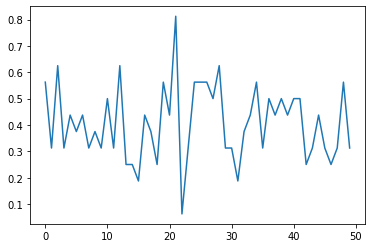

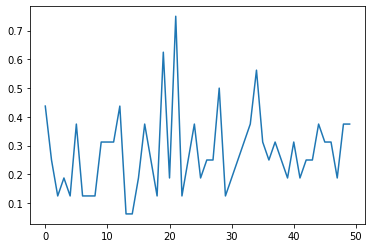

In [93]:
for i in range(10):
  plt.plot([s[i] for s in val_pcp])
  plt.show()

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
								transforms.ToTensor()
])

# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])

# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)

# Building Our Mode
class Network(nn.Module):
	# Declaring the Architecture
	def __init__(self):
		super(Network,self).__init__()
		self.fc1 = nn.Linear(28*28, 256)
		self.fc2 = nn.Linear(256, 128)
		self.fc3 = nn.Linear(128, 10)

	# Forward Pass
	def forward(self, x):
		x = x.view(x.shape[0],-1) # Flatten the images
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = self.fc3(x)
		return x

model = Network()
if torch.cuda.is_available():
	model = model.cuda()

# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# Training with Validation
epochs = 5
min_valid_loss = np.inf

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [5]:
for e in range(epochs):
    train_loss = 0.0
    model.train()     # Optional when not using Model Specific layer
    for data, labels in trainloader:
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        optimizer.zero_grad()
        target = model(data)
        loss = criterion(target,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        target = model(data)
        loss = criterion(target,labels)
        valid_loss = loss.item() * data.size(0)

    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f})')
        #min_valid_loss = valid_loss

Epoch 1 		 Training Loss: 0.17657701584843588 		 Validation Loss: 0.012318493078311031
Epoch 2 		 Training Loss: 0.16192106355603733 		 Validation Loss: 0.011198875622246593
Epoch 3 		 Training Loss: 0.14905690691735946 		 Validation Loss: 0.010236679936369387
Epoch 4 		 Training Loss: 0.13768533576382366 		 Validation Loss: 0.009529616505193253
Epoch 5 		 Training Loss: 0.12761576905291258 		 Validation Loss: 0.008969671810016084
